In [ ]:
import pandas as pd
import numpy as np

nyc_06 = pd.read_csv("../NYC-Bus Data/cleaned_mta_1706.csv")
nyc_08 = pd.read_csv("../NYC-Bus Data/cleaned_mta_1708.csv")
nyc_10 = pd.read_csv("../NYC-Bus Data/cleaned_mta_1710.csv")
nyc_12 = pd.read_csv("../NYC-Bus Data/cleaned_mta_1712.csv")

mapper = {'ExpectedArrivalTime':'ArrivalTime'}
nyc_06.rename(columns=mapper, inplace=True)
display(nyc_06.head())

In [104]:
def fix_time(row):
    try:
        time_str = row['ScheduledArrivalTime']
        if pd.isna(time_str):  
            return np.nan
    except ValueError as e:
        print("Ttime str:", time_str)
        
    hours, minutes, seconds = map(int, time_str.split(':'))
    corrected_hours = hours % 24
    corrected_time = f'{corrected_hours:02}:{minutes:02}:{seconds:02}'

    recorded_at_time = row['RecordedAtTime']
    corrected_time_obj = pd.to_datetime(corrected_time, format='%H:%M:%S')

    if ( ( recorded_at_time.time() <= pd.to_datetime('23:59:59').time() and recorded_at_time.time() > pd.to_datetime('19:00:00').time()) and 
        ( corrected_time_obj.time() >= pd.to_datetime('00:00:00').time() and corrected_time_obj.time() < pd.to_datetime('05:00:00').time())):
        recorded_at_time += pd.Timedelta(days=1)
    elif ( ( recorded_at_time.time() >= pd.to_datetime('00:00:00').time() and recorded_at_time.time() < pd.to_datetime('05:00:00').time()) and 
        ( corrected_time_obj.time() <= pd.to_datetime('23:59:59').time() and corrected_time_obj.time() > pd.to_datetime('19:00:00').time())):
        recorded_at_time -= pd.Timedelta(days=1)

    corrected_datetime = recorded_at_time.replace(hour=corrected_time_obj.hour, minute=corrected_time_obj.minute, second=corrected_time_obj.second)
    return corrected_datetime

In [105]:
# correct the schedule time
for col in ['RecordedAtTime','ArrivalTime']:
    nyc_06[col] = pd.to_datetime(nyc_06[col], format='%Y-%m-%d %H:%M:%S')

nyc_06['CorrectedScheduledArrivalTime'] = nyc_06.apply(fix_time, axis=1)
nyc_06 = nyc_06.drop('ScheduledArrivalTime',axis=1)

# rename the column
mapper = {'CorrectedScheduledArrivalTime':'ScheduledArrivalTime'}
nyc_06.rename(columns=mapper, inplace=True)

nyc_06.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,2017-06-01 00:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,2017-05-31 23:58:02
2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,2017-06-01 00:00:53
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00
4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,2017-05-31 23:59:38


In [106]:
# save the dataset
# nyc_06.to_csv('../NYC-Bus Data/nyc_06.csv')

In [34]:
# load dataset
nyc_06 = pd.read_csv('../NYC-Bus Data/nyc_06.csv').drop('Unnamed: 0',axis=1)
nyc_06.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,2017-06-01 00:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,2017-06-01 23:58:02
2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,2017-06-01 00:00:53
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00
4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,2017-06-01 23:59:38


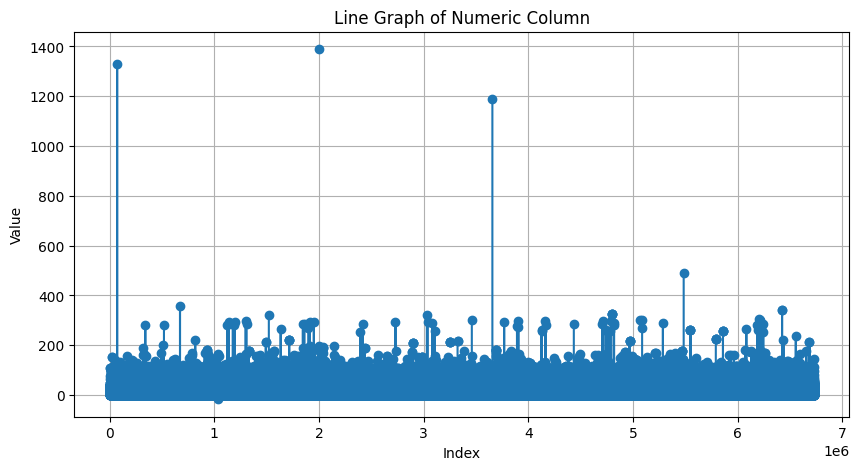

In [107]:
# check arrival time is correct
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

newyork_bus_transit_atstop = nyc_06[nyc_06['ArrivalProximityText']=='at stop']
for col in ['RecordedAtTime','ArrivalTime']:
    newyork_bus_transit_atstop[col] = pd.to_datetime(newyork_bus_transit_atstop[col], format='%Y-%m-%d %H:%M:%S')
newyork_bus_transit_atstop['atstop_recorded_min_arrival_time'] = (newyork_bus_transit_atstop['ArrivalTime'] - newyork_bus_transit_atstop['RecordedAtTime']).dt.total_seconds()

# plotting differnce
plt.figure(figsize=(10, 5))
plt.plot(newyork_bus_transit_atstop.index, newyork_bus_transit_atstop['atstop_recorded_min_arrival_time'], marker='o', linestyle='-')

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Graph of Numeric Column")
plt.grid(True)

plt.show()

In [108]:
# calculate the propotion of zero differnce values
zero_val_record_count = newyork_bus_transit_atstop[newyork_bus_transit_atstop['atstop_recorded_min_arrival_time']<200].shape[0]
atstop_total_records = newyork_bus_transit_atstop.shape[0]

propotion = (zero_val_record_count/atstop_total_records)*100
print('Propotion of lower than 200sec differnce values: ',propotion)

Propotion of lower than 200sec differnce values:  74.50852521245922


In [109]:
newyork_bus_transit_atstop.dtypes

RecordedAtTime                      datetime64[ns]
DirectionRef                                 int64
PublishedLineName                           object
OriginName                                  object
OriginLat                                  float64
OriginLong                                 float64
DestinationName                             object
DestinationLat                             float64
DestinationLong                            float64
VehicleRef                                  object
VehicleLocation.Latitude                   float64
VehicleLocation.Longitude                  float64
NextStopPointName                           object
ArrivalProximityText                        object
DistanceFromStop                           float64
ArrivalTime                         datetime64[ns]
ScheduledArrivalTime                datetime64[ns]
atstop_recorded_min_arrival_time           float64
dtype: object

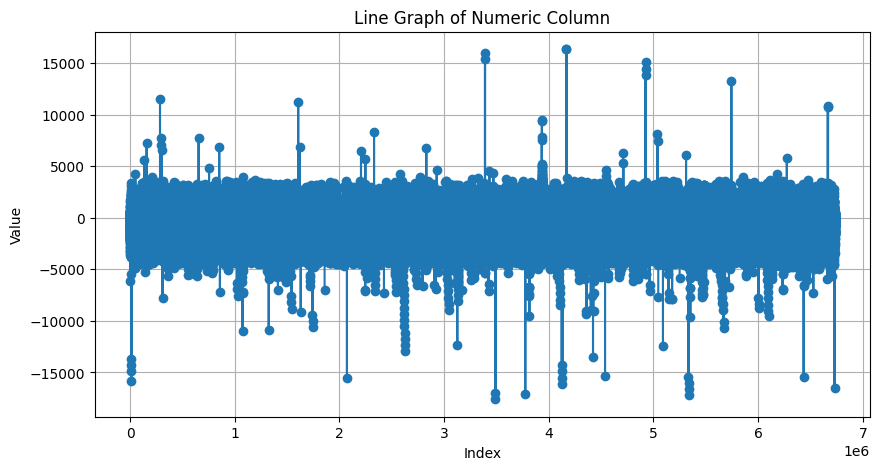

In [110]:
# plot the differnce of schedule time and arrival time
newyork_bus_transit_atstop['schedule_arrival_diff'] = (newyork_bus_transit_atstop['ScheduledArrivalTime'] - newyork_bus_transit_atstop['RecordedAtTime']).dt.total_seconds()

# plotting differnce
plt.figure(figsize=(10, 5))
plt.plot(newyork_bus_transit_atstop.index, newyork_bus_transit_atstop['schedule_arrival_diff'], marker='o', linestyle='-')

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Graph of Numeric Column")
plt.grid(True)

plt.show()

In [111]:
# show me the dataset that diff is larger than 3min
newyork_bus_transit_atstop[newyork_bus_transit_atstop['schedule_arrival_diff']>20000]

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ArrivalTime,ScheduledArrivalTime,atstop_recorded_min_arrival_time,schedule_arrival_diff


In [114]:
# static table
newyork_bus_transit_atstop.describe()

,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,atstop_recorded_min_arrival_time,schedule_arrival_diff
count,1.899894e+06,1.883106e+06,1.883106e+06,1.897719e+06,1.897719e+06,1.899894e+06,1.899894e+06,1.899894e+06,1.415687e+06,1.824936e+06
mean,4.958161e-01,4.072888e+01,-7.392579e+01,4.072909e+01,-7.392546e+01,4.072874e+01,-7.392536e+01,9.956251e+00,1.698450e+01,-3.428635e+02
std,4.999826e-01,9.033836e-02,8.965512e-02,8.904585e-02,9.019026e-02,8.736542e-02,8.554180e-02,8.568584e+00,1.138927e+01,6.001672e+02
min,0.000000e+00,4.050688e+01,-7.424806e+01,4.050811e+01,-7.424819e+01,4.050288e+01,-7.425213e+01,0.000000e+00,-1.700000e+01,-1.759500e+04
25%,0.000000e+00,4.065764e+01,-7.398144e+01,4.066085e+01,-7.398236e+01,4.065903e+01,-7.397608e+01,3.000000e+00,8.000000e+00,-5.150000e+02
50%,0.000000e+00,4.071186e+01,-7.393133e+01,4.071082e+01,-7.393151e+01,4.071725e+01,-7.393249e+01,8.000000e+00,1.500000e+01,-1.910000e+02
75%,1.000000e+00,4.080917e+01,-7.387833e+01,4.080908e+01,-7.387833e+01,4.080555e+01,-7.388067e+01,1.600000e+01,2.400000e+01,-5.000000e+00
max,1.000000e+00,4.091237e+01,-7.370187e+01,4.091238e+01,-7.370139e+01,4.091239e+01,-7.370142e+01,3.000000e+01,1.389000e+03,1.633000e+04


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

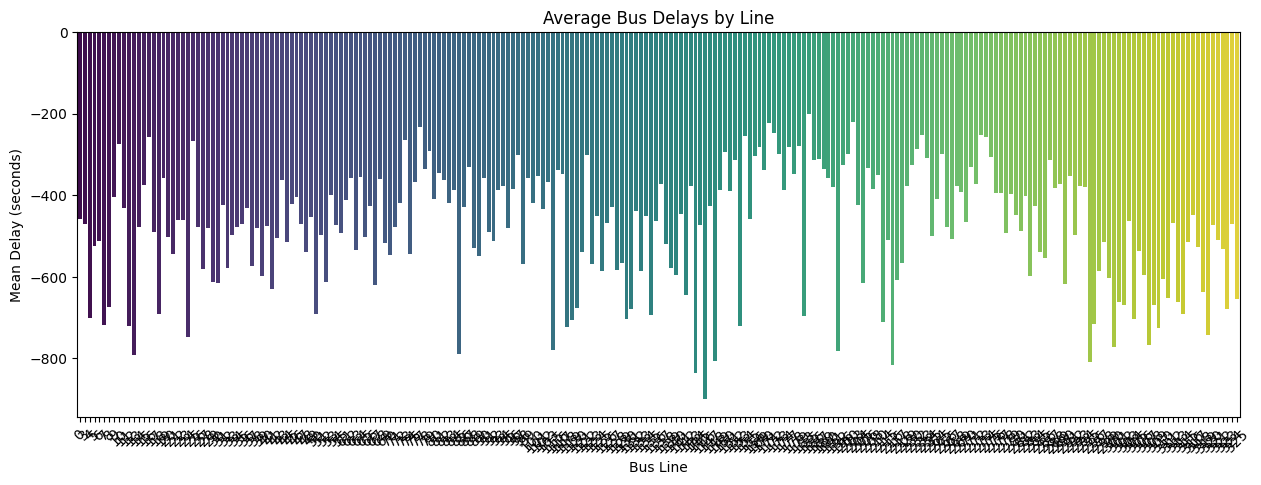

In [121]:
# Initialize the encoder
le = LabelEncoder()
newyork_bus_transit_atstop['BusLineEncoded'] = le.fit_transform(newyork_bus_transit_atstop['PublishedLineName'])
bus_line_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# calculate the mean delay of a bus line
negative_diff = newyork_bus_transit_atstop[newyork_bus_transit_atstop['schedule_arrival_diff']<=0]
bus_line_delays = negative_diff.groupby('BusLineEncoded', as_index=False)['schedule_arrival_diff'].mean()
bus_line_delays.rename(columns={'schedule_arrival_diff': 'mean_delay'}, inplace=True)

# plot the mean delays of each bus line
plt.figure(figsize=(15, 5))
sns.barplot(x='BusLineEncoded', y='mean_delay', data=bus_line_delays, palette='viridis')

# Labels and title
plt.xlabel('Bus Line')
plt.ylabel('Mean Delay (seconds)')
plt.title('Average Bus Delays by Line')
plt.xticks(rotation=45)
plt.show()

In [128]:
print("Min Mean Delay of all the Bus Lines : ",abs(bus_line_delays['mean_delay'].max()),'s')
print("Max Mean Delay of all the Bus Lines : ",abs(bus_line_delays['mean_delay'].min()),'s')
print("Mean Mean Delay of all the Bus Lines : ",abs(bus_line_delays['mean_delay'].mean()),'s')

Min Mean Delay of all the Bus Lines :  200.3477690288714 s
Max Mean Delay of all the Bus Lines :  899.1504424778761 s
Mean Mean Delay of all the Bus Lines :  482.67013932398976 s


In [131]:
print("Min Mean Delay of all the Bus Lines : ",abs(bus_line_delays['mean_delay'].max())//60,'min')
print("Mean Mean Delay of all the Bus Lines : ",abs(bus_line_delays['mean_delay'].mean())//60,'min')
print("Max Mean Delay of all the Bus Lines : ",abs(bus_line_delays['mean_delay'].min())//60,'min')

Min Mean Delay of all the Bus Lines :  3.0 min
Mean Mean Delay of all the Bus Lines :  8.0 min
Max Mean Delay of all the Bus Lines :  14.0 min


In [122]:
newyork_bus_transit = nyc_06.copy()

In [124]:
# static table
newyork_bus_transit.describe()

,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop
count,6.730436e+06,6.667280e+06,6.667280e+06,6.720090e+06,6.720090e+06,6.730436e+06,6.730436e+06,6.723434e+06
mean,5.028072e-01,4.072961e+01,-7.393111e+01,4.072863e+01,-7.393157e+01,4.072848e+01,-7.393071e+01,2.258813e+02
std,4.999922e-01,9.027368e-02,9.427526e-02,9.007214e-02,9.510366e-02,8.681863e-02,8.914022e-02,9.975916e+02
min,0.000000e+00,4.050688e+01,-7.424806e+01,4.050811e+01,-7.424819e+01,4.050288e+01,-7.425234e+01,0.000000e+00
25%,0.000000e+00,4.066066e+01,-7.398737e+01,4.066085e+01,-7.398931e+01,4.065948e+01,-7.397930e+01,2.200000e+01
50%,1.000000e+00,4.071523e+01,-7.393245e+01,4.071336e+01,-7.393227e+01,4.072322e+01,-7.393653e+01,8.900000e+01
75%,1.000000e+00,4.080787e+01,-7.387994e+01,4.080754e+01,-7.387833e+01,4.080318e+01,-7.388241e+01,1.980000e+02
max,1.000000e+00,4.091237e+01,-7.370187e+01,4.091238e+01,-7.370139e+01,4.093266e+01,-7.370141e+01,3.591000e+04


In [123]:
# count of categorical variables
newyork_bus_transit.nunique()

RecordedAtTime                218287
DirectionRef                       2
PublishedLineName                326
OriginName                       606
OriginLat                        662
OriginLong                       660
DestinationName                  778
DestinationLat                   530
DestinationLong                  531
VehicleRef                      5719
VehicleLocation.Latitude      360308
VehicleLocation.Longitude     426793
NextStopPointName              10894
ArrivalProximityText             210
DistanceFromStop               16378
ArrivalTime                   733218
ScheduledArrivalTime         1878898
dtype: int64

In [135]:
# check for missing values
newyork_bus_transit.isna().sum()

RecordedAtTime                    0
DirectionRef                      0
PublishedLineName                 0
OriginName                    63156
OriginLat                     63156
OriginLong                    63156
DestinationName                   0
DestinationLat                10346
DestinationLong               10346
VehicleRef                        0
VehicleLocation.Latitude          0
VehicleLocation.Longitude         0
NextStopPointName              7002
ArrivalProximityText           7002
DistanceFromStop               7002
ArrivalTime                  872302
ScheduledArrivalTime         172333
dtype: int64

In [133]:
# check for entire row duplications
newyork_bus_transit.duplicated().any()

False

In [142]:
# handle missing values
newyork_bus_transit.dropna(subset=['ArrivalTime'],inplace=True)
newyork_bus_transit_prep_1 = newyork_bus_transit.drop(['ScheduledArrivalTime','OriginName','OriginLat','OriginLong','DestinationLat','DestinationLong'],axis=1)
newyork_bus_transit_prep_1.isna().sum()


RecordedAtTime               0
DirectionRef                 0
PublishedLineName            0
DestinationName              0
VehicleRef                   0
VehicleLocation.Latitude     0
VehicleLocation.Longitude    0
NextStopPointName            0
ArrivalProximityText         0
DistanceFromStop             0
ArrivalTime                  0
dtype: int64

In [149]:
newyork_bus_transit_prep_2 = newyork_bus_transit_prep_1.copy()

# add day type to dataset
newyork_bus_transit_prep_2['is_weekend'] = newyork_bus_transit_prep_2['RecordedAtTime'].dt.dayofweek >= 5

# add peek hours to dataset
newyork_bus_transit_prep_2['hour'] = newyork_bus_transit_prep_2['RecordedAtTime'].dt.hour
newyork_bus_transit_prep_2['is_peekhour'] = newyork_bus_transit_prep_2['hour'].between(6, 10) | newyork_bus_transit_prep_2['hour'].between(15, 19)

# order the datset according to time and bus line
newyork_bus_transit_prep_2.sort_values(by=['RecordedAtTime'], ascending=True, inplace=True)

# encode next busstop
lbencoder = LabelEncoder()
newyork_bus_transit_prep_2['bus_stop'] = lbencoder.fit_transform(newyork_bus_transit_prep_2['NextStopPointName'])

# encode vehicle ref
lbencoder = LabelEncoder()
newyork_bus_transit_prep_2['vehicle_id'] = lbencoder.fit_transform(newyork_bus_transit_prep_2['VehicleRef'])

# calculate the travel time
newyork_bus_transit_prep_2['travel_time'] = (newyork_bus_transit_prep_2['ArrivalTime'] - newyork_bus_transit_prep_2['RecordedAtTime']).dt.total_seconds()


In [ ]:
# newyork_bus_transit_prep_2.to_csv('../NYC-Bus Data/newyork_bus_transit_prep_2.csv')

In [4]:
# read the saved dataset
newyork_bus_transit_prep_2 = pd.read_csv('../NYC-Bus Data/newyork_bus_transit_prep_2.csv').drop('Unnamed: 0',axis=1)

In [5]:
# keep only approaching records
newyork_bus_transit_prep_3 = newyork_bus_transit_prep_2.copy()
newyork_bus_transit_prep_3 = newyork_bus_transit_prep_3[(newyork_bus_transit_prep_3['ArrivalProximityText']=='approaching')]

# count unique values
newyork_bus_transit_prep_3.nunique()

RecordedAtTime               165176
DirectionRef                      2
PublishedLineName               323
DestinationName                 769
VehicleRef                     5391
VehicleLocation.Latitude     309731
VehicleLocation.Longitude    310710
NextStopPointName             10069
ArrivalProximityText              1
DistanceFromStop                123
ArrivalTime                  284795
is_weekend                        2
hour                             24
is_peekhour                       2
bus_stop                      10069
vehicle_id                     5391
travel_time                     422
dtype: int64

In [17]:
from geopy.distance import geodesic

newyork_bus_transit_prep_4 = newyork_bus_transit_prep_3.copy()
unique_stops = newyork_bus_transit_prep_4.groupby('bus_stop', as_index=False).first()
def find_nearby_stops(df, threshold=30):
    stop_groups = {}  # Dictionary to store corrected stop IDs
    visited = set()   # Keep track of visited stops
    stop_id_map = {}  # Map old stop_id to new one

    for i, stop1 in df.iterrows():
        print(i)
        if stop1['bus_stop'] in visited:
            continue  # Skip if already merged

        nearby = []
        for j, stop2 in df.iterrows():
            if i != j:  # Avoid self-comparison
                distance = geodesic((stop1['VehicleLocation.Latitude'], stop1['VehicleLocation.Longitude']),
                                    (stop2['VehicleLocation.Latitude'], stop2['VehicleLocation.Longitude'])).meters
                if distance < threshold:
                    nearby.append(stop2['bus_stop'])        # Mark as the same stop

        new_stop_id = min([stop1['bus_stop']] + nearby)     # Use the smallest ID as the main one
        stop_groups[new_stop_id] = list(set([stop1['bus_stop']] + nearby))
        visited.update(stop_groups[new_stop_id])

        # Map all stops in this group to the new ID
        for stop in stop_groups[new_stop_id]:
            stop_id_map[stop] = new_stop_id

    return stop_id_map

stop_id_map = find_nearby_stops(unique_stops)
# unique_stops['bus_stop'] = unique_stops['bus_stop'].map(stop_id_map) 


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
newyork_bus_transit_prep_4['bus_stop'] = newyork_bus_transit_prep_4['bus_stop'].map(stop_id_map) 

In [ ]:
# save dataset
# newyork_bus_transit_prep_4.to_csv('../NYC-Bus Data/newyork_bus_transit_prep_4.csv',index=False)

In [23]:
newyork_bus_transit_prep_4.nunique()

RecordedAtTime               165176
DirectionRef                      2
PublishedLineName               323
DestinationName                 769
VehicleRef                     5391
VehicleLocation.Latitude     309731
VehicleLocation.Longitude    310710
NextStopPointName             10069
ArrivalProximityText              1
DistanceFromStop                123
ArrivalTime                  284795
is_weekend                        2
hour                             24
is_peekhour                       2
bus_stop                       9196
vehicle_id                     5391
travel_time                     422
dtype: int64

In [11]:
# order the bus stops along routes
import networkx as nx
import osmnx as ox
import pandas as pd

# Load road network for New York (or your city)
G = ox.graph_from_place("New York City, USA", network_type="drive")


In [ ]:
newyork_bus_transit_prep_5 = newyork_bus_transit_prep_4.copy()
unique_stops = newyork_bus_transit_prep_5.groupby('bus_stop', as_index=False).first()
unique_stops['node'] = unique_stops.apply(lambda row: ox.distance.nearest_nodes(G, row['VehicleLocation.Longitude'], row['VehicleLocation.Latitude']), axis=1)


In [ ]:
ordered_stops = pd.DataFrame()

for route in unique_stops['PublishedLineName'].unique():
    route_stops = unique_stops[unique_stops['PublishedLineName'] == route].copy()
    
    # Get the two most distant stops as start & end 
    start_node = route_stops.iloc[0]['node']
    end_node = route_stops.iloc[-1]['node']

    shortest_path = nx.shortest_path(G, source=start_node, target=end_node)
    route_stops = route_stops[route_stops['node'].isin(shortest_path)].sort_values(by='node')
    ordered_stops = pd.concat([ordered_stops, route_stops])
    print(route)

ordered_stops.reset_index(drop=True, inplace=True)

In [ ]:
# ordered_stops.to_csv('../NYC-Bus Data/ordered_stops.csv')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.scatter(ordered_stops['Longitude'], ordered_stops['Latitude'], c='blue', label='Ordered Stops')
plt.plot(ordered_stops['Longitude'], ordered_stops['Latitude'], c='red', linestyle='dashed', label='Route Path')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Ordered Bus Stops Along Route")
plt.legend()
plt.show()

In [ ]:
# check the correaltion between varas
newyork_bus_transit_prep_6 = newyork_bus_transit_prep_5.copy()
newyork_bus_transit_prep_6 = newyork_bus_transit_prep_5.drop(['VehicleRef','NextStopPointName','ArrivalTime','ArrivalProximityText','DestinationName'],axis=1)

# correlation of numeric features and target
newyork_bus_transit_prep_6[['DistanceFromStop','travel_time']].corr()

,RecordedAtTime,DirectionRef,PublishedLineName,VehicleLocation.Latitude,VehicleLocation.Longitude,DistanceFromStop,is_weekend,hour,is_peekhour,bus_stop,vehicle_id,travel_time
0,2017-06-01 00:02:05,0,B15,40.669059,-73.875665,147.0,False,0,False,3940,4387,111.0
1,2017-06-01 00:02:29,0,Q2,40.713117,-73.735867,67.0,False,0,False,5594,5705,87.0
5,2017-06-01 00:03:21,0,Bx42,40.845963,-73.892234,147.0,False,0,False,4400,2897,73.0
10,2017-06-01 00:03:23,1,B1,40.578112,-73.941157,85.0,False,0,False,7847,2997,33.0
12,2017-06-01 00:03:23,1,Bx7,40.853079,-73.934253,71.0,False,0,False,3051,2482,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5858128,2017-06-30 23:53:38,0,M66,40.773196,-73.982620,74.0,False,23,False,9992,3303,67.0
5858129,2017-06-30 23:53:38,0,B60,40.706845,-73.940486,107.0,False,23,False,6247,2680,25.0
5858130,2017-06-30 23:53:38,1,B52,40.688642,-73.929502,94.0,False,23,False,5213,4803,29.0
5858131,2017-06-30 23:53:38,1,Q43,40.713014,-73.782321,96.0,False,23,False,5638,5234,24.0


In [ ]:
from scipy.stats import f_oneway, pointbiserialr

categories = newyork_bus_transit_prep_6['BusRoute'].unique()
anova_results = f_oneway(*(newyork_bus_transit_prep_6[newyork_bus_transit_prep_6['BusRoute'] == cat]['Delay'] for cat in categories))
corr, p_value = pointbiserialr(newyork_bus_transit_prep_6['IsWeekend'], newyork_bus_transit_prep_6['Delay'])
print(f"Point-Biserial Correlation: {corr}, p-value: {p_value}")
print(f"ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")


Correlation highest to low
1. DistanceFromStop